In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Exploratory Analysis

In [2]:
data = pd.read_pickle('data.pkl')

In [3]:
data.set_index('state_county', inplace=True)

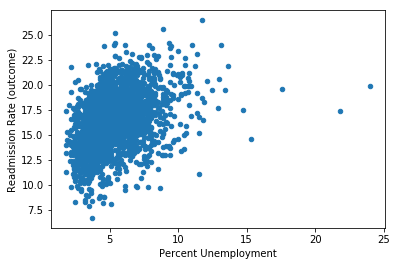

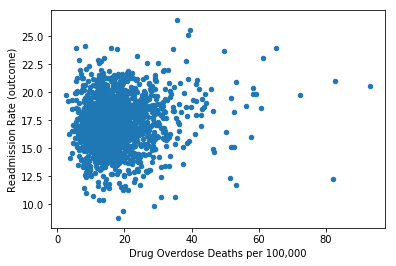

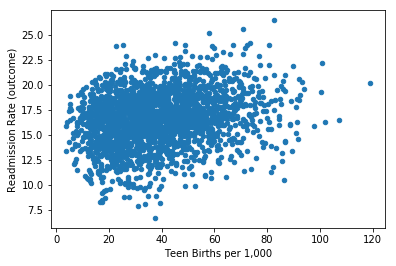

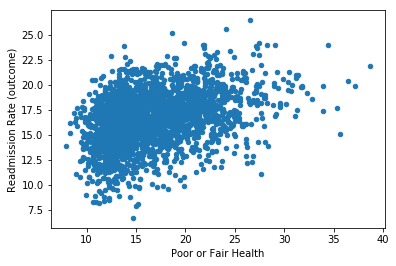

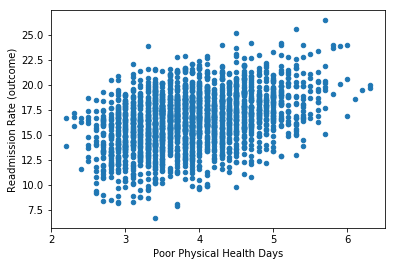

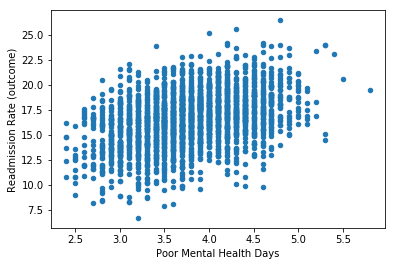

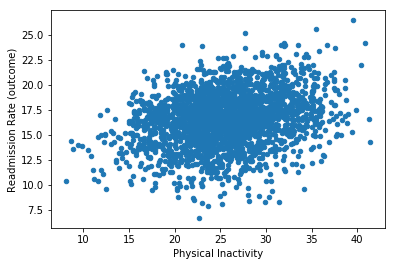

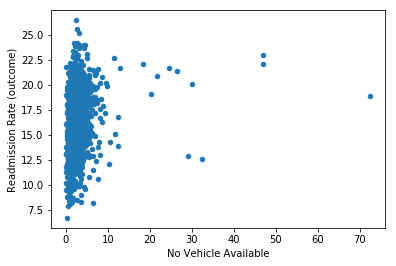

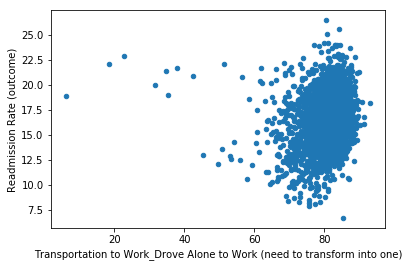

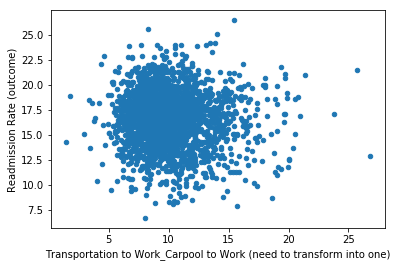

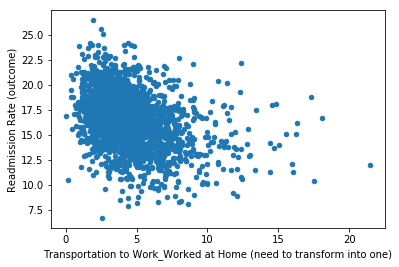

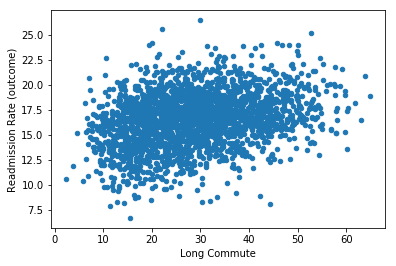

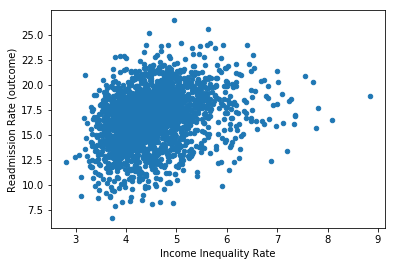

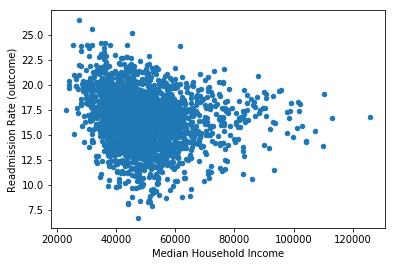

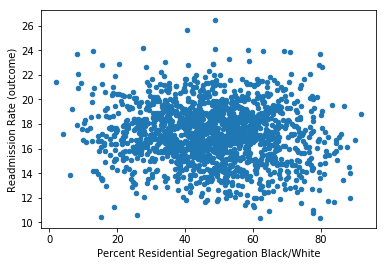

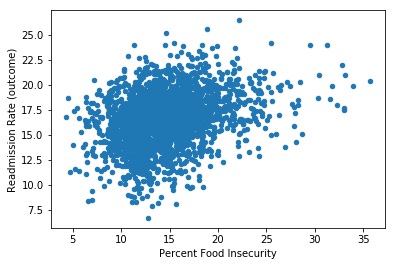

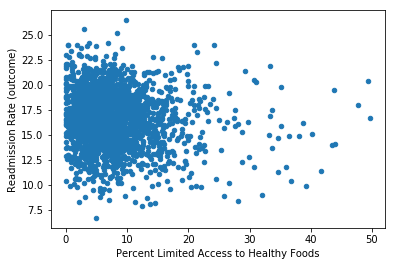

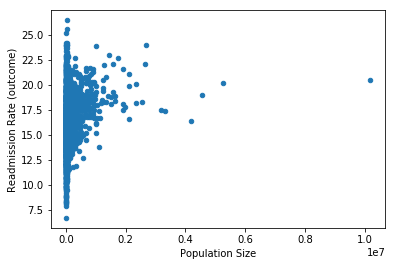

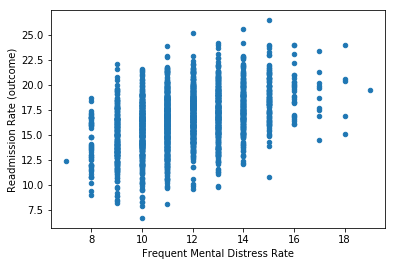

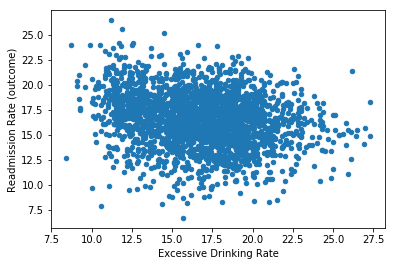

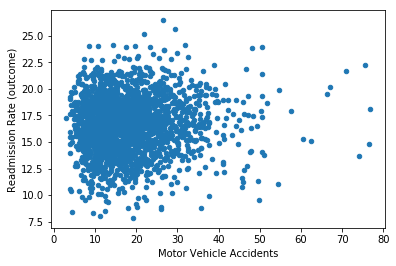

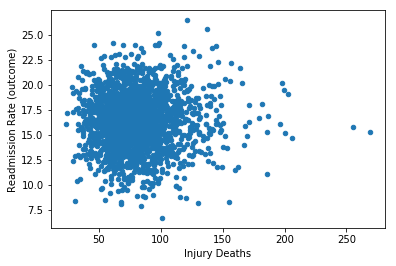

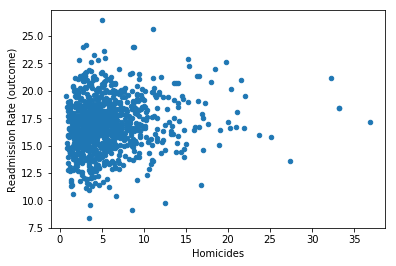

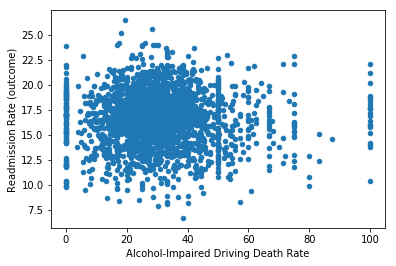

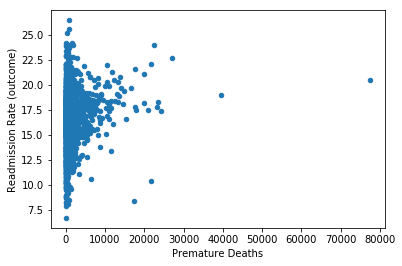

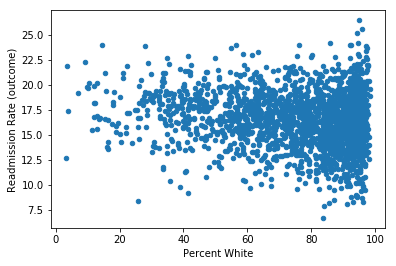

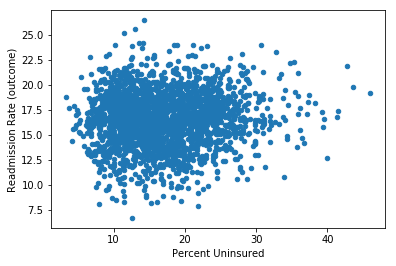

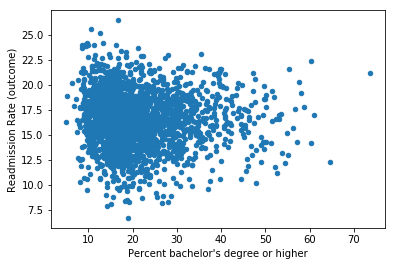

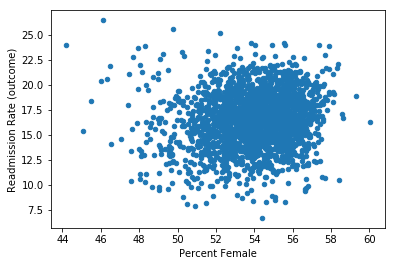

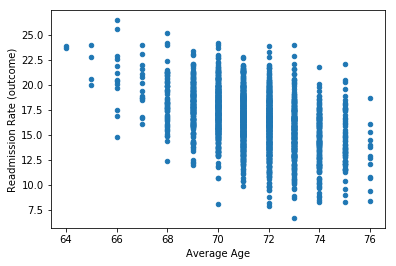

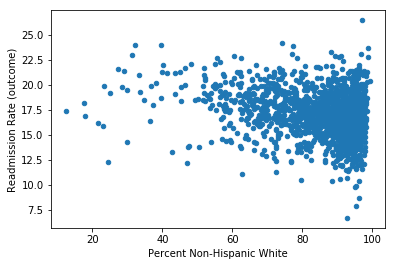

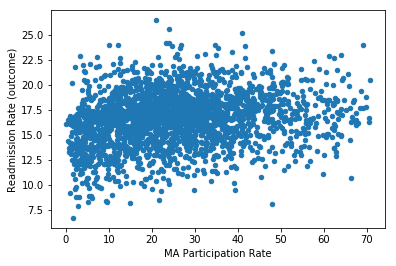

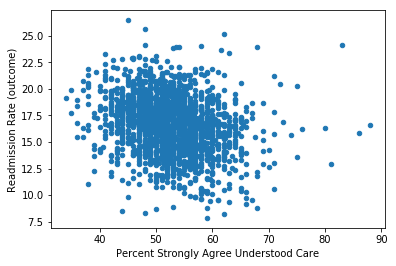

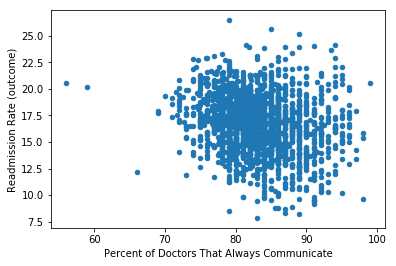

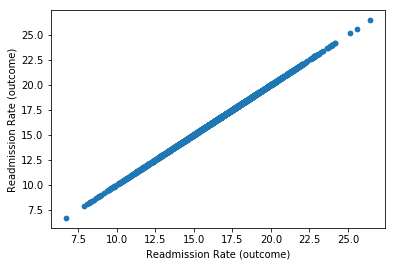

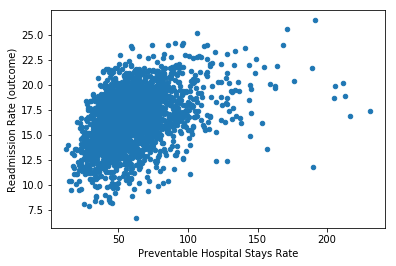

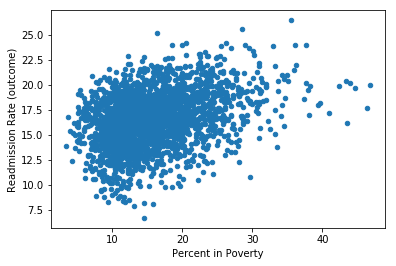

In [4]:
for i in data.columns:
    data_test = pd.concat([data['Readmission Rate (outcome)'], data[i]], axis=1)
    data_test.plot.scatter(x=i, y='Readmission Rate (outcome)')

### Categorize outcome variables into four groups (create labels)

In [5]:
data['Readmission Rate (outcome)'].describe()

count    2445.000000
mean       16.584961
std         2.682624
min         6.710000
25%        14.910000
50%        16.680000
75%        18.370000
max        26.430000
Name: Readmission Rate (outcome), dtype: float64

In [6]:
def get_label(x):
    cut_1 = (sorted(data['Readmission Rate (outcome)'].tolist())[-1] - sorted(data['Readmission Rate (outcome)'].tolist())[0])/3 + sorted(data['Readmission Rate (outcome)'].tolist())[0]
    cut_2 = sorted(data['Readmission Rate (outcome)'].tolist())[-1] - ((sorted(data['Readmission Rate (outcome)'].tolist())[-1] - sorted(data['Readmission Rate (outcome)'].tolist())[0])/3) 
    if x<cut_1:
        label=0
    elif cut_1<=x<cut_2:
        label=1
    else:
        label=2
    return label

In [7]:
data['label'] = data['Readmission Rate (outcome)'].apply(get_label)

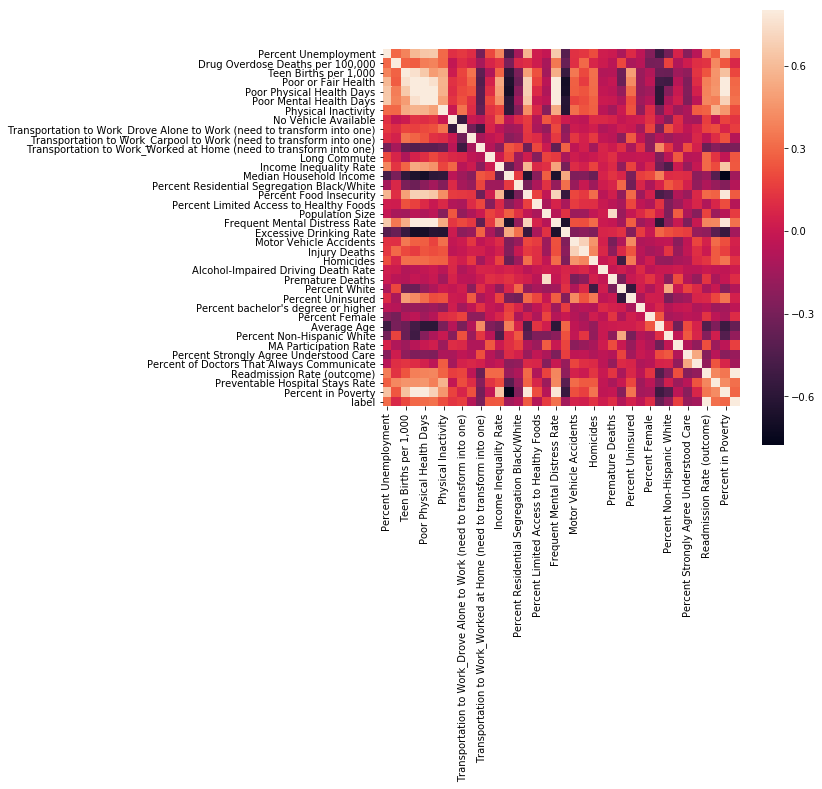

In [8]:
corrmat = data.drop('Readmission Rate (outcome)').corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8,annot=False, square=True, fmt='.2f')

### Dealing with missing data

In [9]:
data.isnull().sum()

Percent Unemployment                                                         89
Drug Overdose Deaths per 100,000                                           1005
Teen Births per 1,000                                                       109
Poor or Fair Health                                                          89
Poor Physical Health Days                                                    89
Poor Mental Health Days                                                      89
Physical Inactivity                                                          89
No Vehicle Available                                                         89
Transportation to Work_Drove Alone to Work (need to transform into one)      89
Transportation to Work_Carpool to Work (need to transform into one)          89
Transportation to Work_Worked at Home (need to transform into one)           89
Long Commute                                                                 89
Income Inequality Rate                  

Delete four variables with too many missing values

In [10]:
data.drop(['Drug Overdose Deaths per 100,000','Percent Residential Segregation Black/White','Homicides','Percent Non-Hispanic White'], axis=1, inplace=True)

insert missing values with average of each column

In [11]:
data.fillna(data.mean(), inplace=True)

In [12]:
data.isnull().sum()

Percent Unemployment                                                       0
Teen Births per 1,000                                                      0
Poor or Fair Health                                                        0
Poor Physical Health Days                                                  0
Poor Mental Health Days                                                    0
Physical Inactivity                                                        0
No Vehicle Available                                                       0
Transportation to Work_Drove Alone to Work (need to transform into one)    0
Transportation to Work_Carpool to Work (need to transform into one)        0
Transportation to Work_Worked at Home (need to transform into one)         0
Long Commute                                                               0
Income Inequality Rate                                                     0
Median Household Income                                                    0

In [13]:
data.head()

,Percent Unemployment,"Teen Births per 1,000",Poor or Fair Health,Poor Physical Health Days,Poor Mental Health Days,Physical Inactivity,No Vehicle Available,Transportation to Work_Drove Alone to Work (need to transform into one),Transportation to Work_Carpool to Work (need to transform into one),Transportation to Work_Worked at Home (need to transform into one),...,Percent bachelor's degree or higher,Percent Female,Average Age,MA Participation Rate,Percent Strongly Agree Understood Care,Percent of Doctors That Always Communicate,Readmission Rate (outcome),Preventable Hospital Stays Rate,Percent in Poverty,label
state_county,,,,,,,,,,,,,,,,,,,,,
al_autauga,5.2,32.4,17.9,4.2,4.2,28.6,0.97,86.78,9.14,2.07,...,24.6,55.61,70.0,36.15,50.0,83.000000,16.76,58.59,12.7,1
al_baldwin,5.5,38.0,16.4,3.7,4.0,22.3,0.78,84.71,7.62,5.08,...,29.5,54.08,72.0,36.35,53.0,84.333333,15.81,47.61,12.9,1
al_barbour,8.9,59.0,25.0,4.8,4.8,31.8,4.33,82.78,11.68,1.26,...,12.9,56.48,69.0,23.79,44.0,85.000000,18.44,73.50,32.0,1
al_bibb,6.6,47.5,19.5,4.4,4.4,33.9,1.98,85.07,11.24,1.22,...,12.0,53.93,68.0,42.44,36.0,87.000000,15.49,77.35,22.2,1
al_blount,5.4,43.2,18.9,4.5,4.5,28.0,1.03,86.11,10.15,2.25,...,13.0,54.19,70.0,44.17,52.0,80.000000,15.31,63.02,14.7,1


(2445, 34)

Number of samples per class:
 [[   0  273]
 [   1 1924]
 [   2  248]]
Target names: [1 2 0]
Feature names: ['Percent Unemployment', 'Teen Births per 1,000', 'Poor or Fair Health', 'Poor Physical Health Days', 'Poor Mental Health Days', 'Physical Inactivity', 'No Vehicle Available', 'Transportation to Work_Drove Alone to Work (need to transform into one)', 'Transportation to Work_Carpool to Work (need to transform into one)', 'Transportation to Work_Worked at Home (need to transform into one)', 'Long Commute', 'Income Inequality Rate', 'Median Household Income', 'Percent Food Insecurity', 'Percent Limited Access to Healthy Foods', 'Population Size', 'Frequent Mental Distress Rate', 'Excessive Drinking Rate', 'Motor Vehicle Accidents', 'Injury Deaths', 'Alcohol-Impaired Driving Death Rate', 'Premature Deaths', 'Percent White', 'Percent Uninsured', "Percent bachelor's degree or higher", 'Percent Female', 'Average Age', 'MA Participation Rate', 'Percent Strongly Agree Understoo

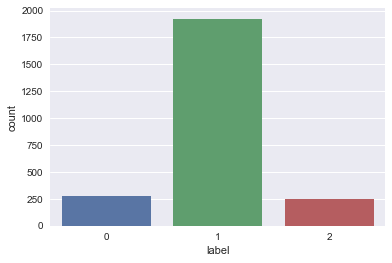

In [14]:
feature = data.columns.drop(['label'])
X = np.array(data[feature])
y = data.label

print(data.shape)
print('\nNumber of samples per class:\n', np.asarray(np.unique(y, return_counts=True)).T)

print('Target names:', y.unique())
print('Feature names:', feature.tolist())

plt.figure(figsize=(6,4))
sns.set(style='darkgrid')
sns.countplot(x='label', data=data)
plt.show()

In [15]:
from sklearn.preprocessing import Normalizer
data_norm = pd.DataFrame(Normalizer().fit_transform(data))
data_norm.columns = data.columns
data_norm['label'] = data['label'].values

### Normalization and plot heatmap

In [16]:
data_norm.head()

,Percent Unemployment,"Teen Births per 1,000",Poor or Fair Health,Poor Physical Health Days,Poor Mental Health Days,Physical Inactivity,No Vehicle Available,Transportation to Work_Drove Alone to Work (need to transform into one),Transportation to Work_Carpool to Work (need to transform into one),Transportation to Work_Worked at Home (need to transform into one),...,Percent bachelor's degree or higher,Percent Female,Average Age,MA Participation Rate,Percent Strongly Agree Understood Care,Percent of Doctors That Always Communicate,Readmission Rate (outcome),Preventable Hospital Stays Rate,Percent in Poverty,label
0,0.000066,0.000409,0.000226,0.000053,0.000053,0.000361,0.000012,0.001096,0.000115,0.000026,...,0.000311,0.000703,0.000884,0.000457,0.000632,0.001049,0.000212,0.000740,0.000160,1
1,0.000026,0.000181,0.000078,0.000018,0.000019,0.000106,0.000004,0.000403,0.000036,0.000024,...,0.000140,0.000257,0.000342,0.000173,0.000252,0.000401,0.000075,0.000226,0.000061,1
2,0.000216,0.001432,0.000607,0.000116,0.000116,0.000772,0.000105,0.002009,0.000283,0.000031,...,0.000313,0.001370,0.001674,0.000577,0.001068,0.002063,0.000447,0.001783,0.000776,1
3,0.000142,0.001019,0.000418,0.000094,0.000094,0.000727,0.000042,0.001825,0.000241,0.000026,...,0.000257,0.001157,0.001459,0.000911,0.000772,0.001867,0.000332,0.001660,0.000476,1
4,0.000070,0.000564,0.000247,0.000059,0.000059,0.000365,0.000013,0.001123,0.000132,0.000029,...,0.000170,0.000707,0.000913,0.000576,0.000678,0.001044,0.000200,0.000822,0.000192,1


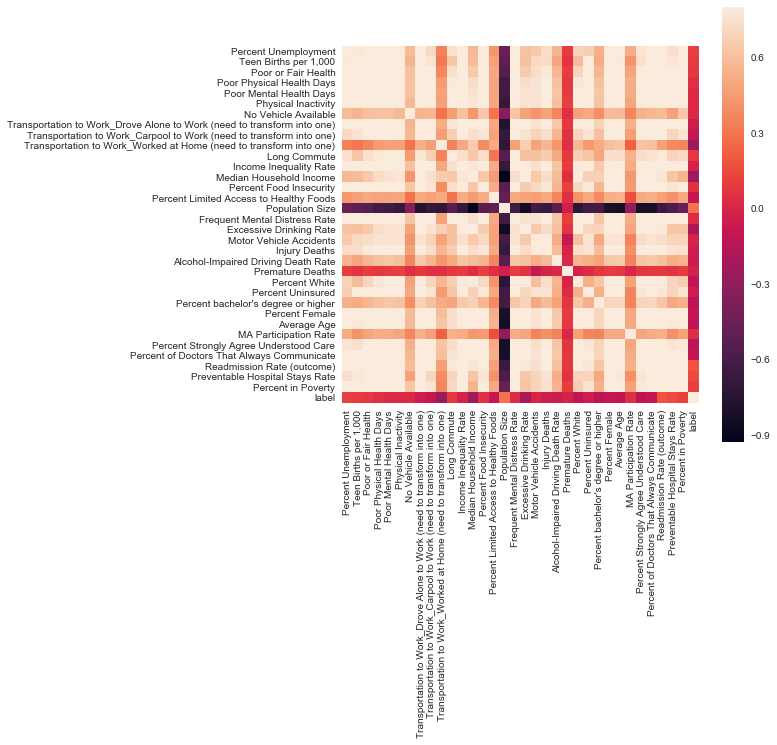

In [17]:
corrmat = data_norm.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8,annot=False, square=True, fmt='.2f')